In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
df1=pd.read_csv("Sent_by_day_2020.csv")
df2=pd.read_csv("Sent_by_day_2021.csv")

In [3]:
df1 = df1.drop('Unnamed: 0', axis=1)
df2 = df2.drop('Unnamed: 0', axis=1)

In [4]:
df1['Date'] = pd.to_datetime(df1[['Year', 'Month', 'Day']])

In [5]:
df2['Date'] = pd.to_datetime(df2[['Year', 'Month', 'Day']])

In [6]:
df1

,Year,Month,Day,Sentiment,Count,Avg_Per,Date
0,2020,1,29,negative,100304,0.826871,2020-01-29
1,2020,1,29,neutral,14862,0.122654,2020-01-29
2,2020,1,29,positive,5904,0.050476,2020-01-29
3,2020,1,30,negative,87525,0.808246,2020-01-30
4,2020,1,30,neutral,13103,0.129362,2020-01-30
...,...,...,...,...,...,...,...
994,2020,12,30,neutral,69127,0.115640,2020-12-30
995,2020,12,30,positive,29134,0.050326,2020-12-30
996,2020,12,31,negative,419770,0.822196,2020-12-31
997,2020,12,31,neutral,54669,0.110790,2020-12-31


In [7]:
df2

,Year,Month,Day,Sentiment,Count,Avg_Per,Date
0,2020,1,29,negative,100304,0.826871,2020-01-29
1,2020,1,29,neutral,14862,0.122654,2020-01-29
2,2020,1,29,positive,5904,0.050476,2020-01-29
3,2020,1,30,negative,87525,0.808246,2020-01-30
4,2020,1,30,neutral,13103,0.129362,2020-01-30
...,...,...,...,...,...,...,...
2068,2022,1,6,neutral,56573,0.090361,2022-01-06
2069,2022,1,6,positive,16482,0.026760,2022-01-06
2070,2022,1,7,negative,492500,0.873165,2022-01-07
2071,2022,1,7,neutral,56138,0.098453,2022-01-07


In [8]:
#df2.to_csv('2020_2022_all_sent.csv')

In [9]:
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined

,Year,Month,Day,Sentiment,Count,Avg_Per,Date
0,2020,1,29,negative,100304,0.826871,2020-01-29
1,2020,1,29,neutral,14862,0.122654,2020-01-29
2,2020,1,29,positive,5904,0.050476,2020-01-29
3,2020,1,30,negative,87525,0.808246,2020-01-30
4,2020,1,30,neutral,13103,0.129362,2020-01-30
...,...,...,...,...,...,...,...
3067,2022,1,6,neutral,56573,0.090361,2022-01-06
3068,2022,1,6,positive,16482,0.026760,2022-01-06
3069,2022,1,7,negative,492500,0.873165,2022-01-07
3070,2022,1,7,neutral,56138,0.098453,2022-01-07


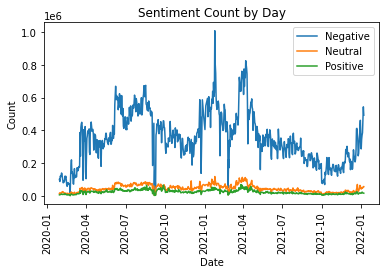

In [10]:
# group by sentiment and date
df_by_sentiment = df2.groupby(['Sentiment', 'Date']).sum()['Count']

# plot count by day for each sentiment
fig, ax = plt.subplots()
ax.plot(df_by_sentiment.loc['negative'].index, df_by_sentiment.loc['negative'].values, label='Negative')
ax.plot(df_by_sentiment.loc['neutral'].index, df_by_sentiment.loc['neutral'].values, label='Neutral')
ax.plot(df_by_sentiment.loc['positive'].index, df_by_sentiment.loc['positive'].values, label='Positive')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Sentiment Count by Day')
ax.legend()
fig.autofmt_xdate(rotation=90, ha='center')
plt.subplots_adjust(bottom=0.25)
plt.show()